In [1]:
# Generate a Package
] generate MyPackage

LoadError: syntax: unexpected "]"

In [2]:
# Tell Julia to use current folder as project folder
using Pkg
Pkg.activate(".")

  Activating project at `~/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise1/material`


In [3]:
# Tell Julia to install all dependencies
using Pkg
Pkg.instantiate()

┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /Users/lukas/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise1/material/Manifest.toml:0


In [4]:
msg = "Hello"

if length(msg) > 5
    println("too long")
elseif length(msg) < 5
    println("too short")
else
    println("just right")
end
    

just right


In [5]:
for i in 1:10
    println("i: $i")
end


i: 1
i: 2
i: 3
i: 4
i: 5
i: 6
i: 7
i: 8
i: 9
i: 10


In [6]:
x = rand(2, 3)
y = rand(2, 3)
z = rand(2, 3)

@. z = x + y - π

2×3 Matrix{Float64}:
 -1.82922  -2.16043  -2.46061
 -2.16079  -1.49535  -1.63442

In [7]:
x = rand(2, 3)
x = x .* x

2×3 Matrix{Float64}:
 0.702631   0.473467   0.65456
 0.0272176  0.0375974  1.07379e-6

In [8]:
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
┌ Warning: The active manifest file at `/Users/lukas/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise1/material/Manifest.toml` has an old format that is being maintained.
│ To update to the new format run `Pkg.upgrade_manifest()` which will upgrade the format without re-resolving.
└ @ Pkg.Types /Users/sabae/src/julia/usr/share/julia/stdlib/v1.7/Pkg/src/manifest.jl:287
  No Changes to `~/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise1/material/Project.toml`
  No Changes to `~/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise1/material/Manifest.toml`


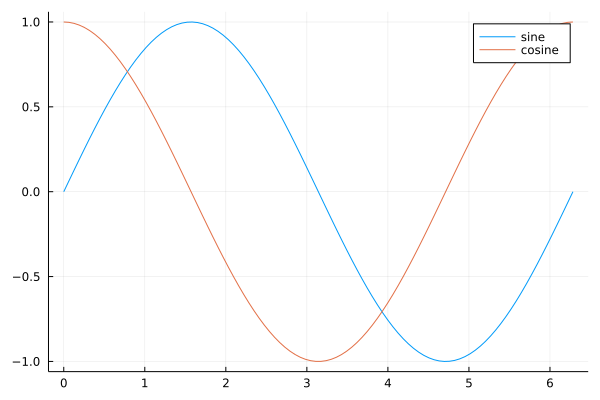

In [9]:

using Plots
x = LinRange(0, 2π, 100)
y = sin.(x)
plot(x, y, label="sine")
plot!(x, cos, label="cosine") # ! write into current plot , give func cos

In [10]:
abstract type MyType end;

mutable struct Point <: MyType
    x::Int
    y::Int
end

p = Point(1, 2)
println(p.x)
p.x = 3 # Only possible with mutable struct

1


3

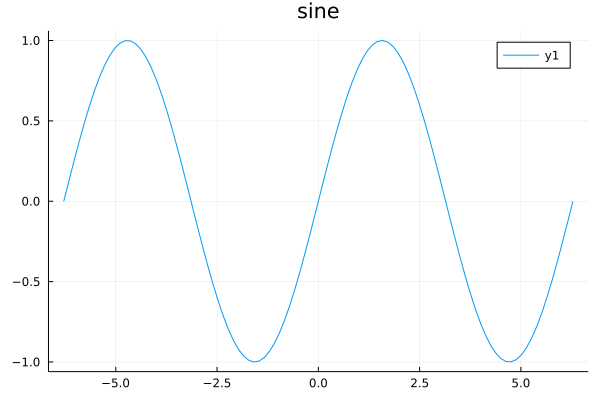

In [11]:
x = LinRange(-2π, 2π, 100)
plot(x, sin, title="sine")
# plotting sin function on our x

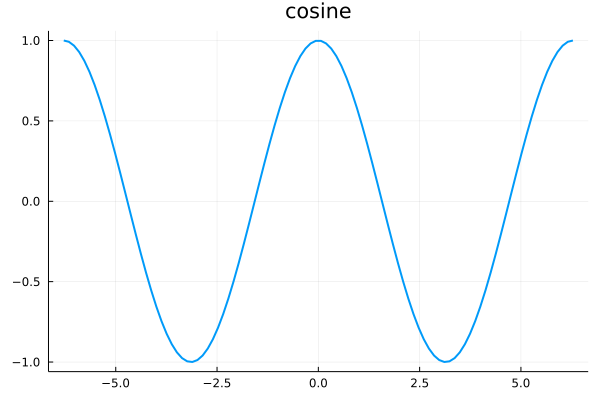

In [12]:
plot(x, cos, title="cosine", linewidth=2, label=false)

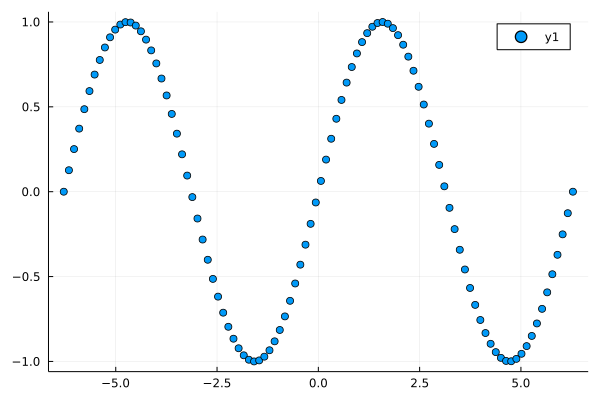

In [13]:
plot(x, sin, seriestype="scatter")

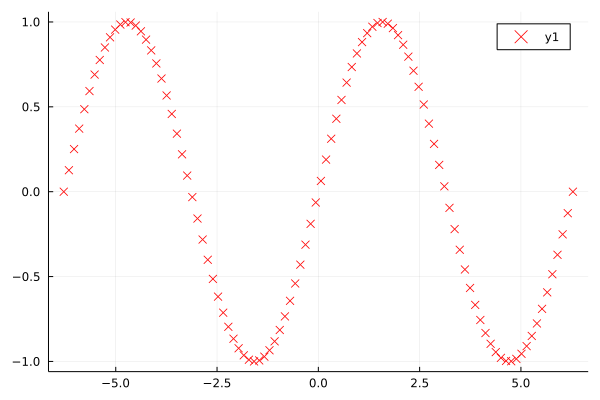

In [14]:
scatter(x, sin, marker=:x, markercolor="red")

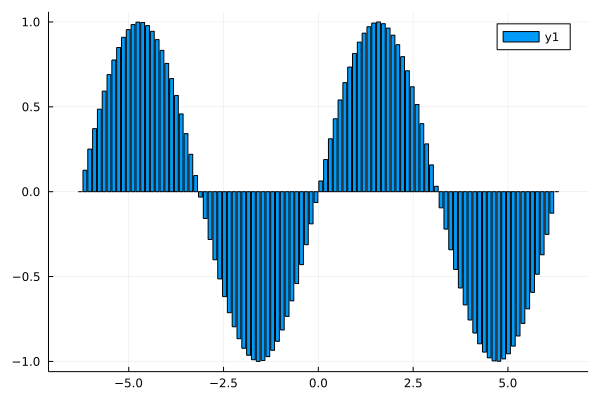

In [15]:
bar(x, sin)

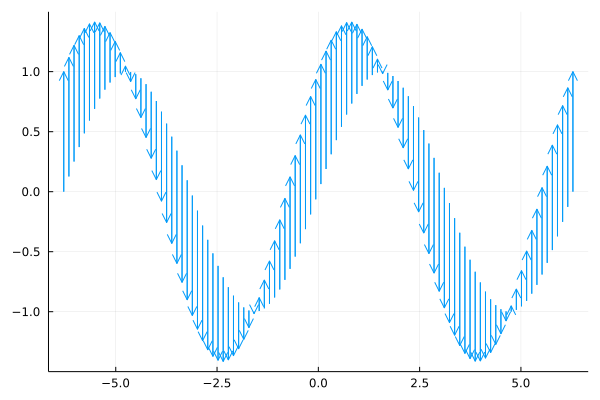

In [16]:
# draws arrows at given location
# arrow direction is given by quiver argument
# Example plot sin function plus derivative as arrows
quiver(x, sin, quiver=(zeros(length(x)), cos.(x)))

In [1]:
quiver(x, sin, quiver=(zeros(length(x)), cos.(x)))
plot!(x, sin, color="red")

LoadError: UndefVarError: x not defined

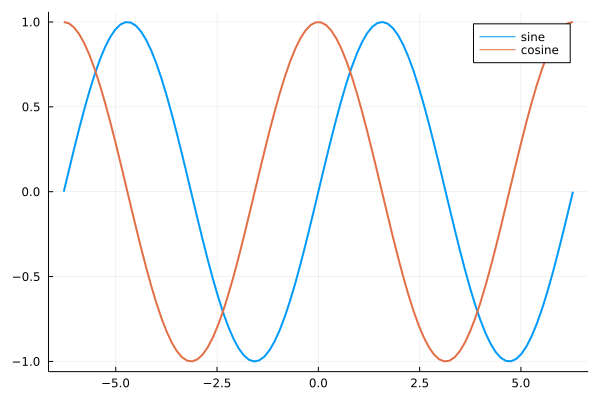

In [12]:
plot(x, sin, label="sine", linewidth=2)
plot!(x, cos, label="cosine", linewidth=2)

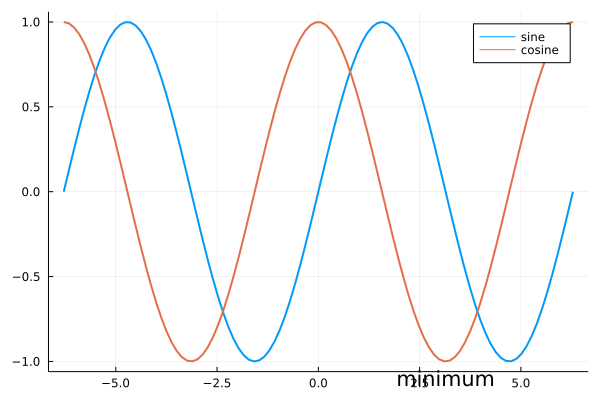

In [13]:
annotate!(π, -1.1, "minimum")

In [1]:
p¹ = plot(x, sin, linewidth=2, label=false)
p² = plot(x, cos, linewidth=2, label=false)
p³ = plot(x, sin.(x) .* cos.(x), linewidth=2, label=false)
plot(p¹, p², p³, layout=(1, 3))

LoadError: UndefVarError: plot not defined

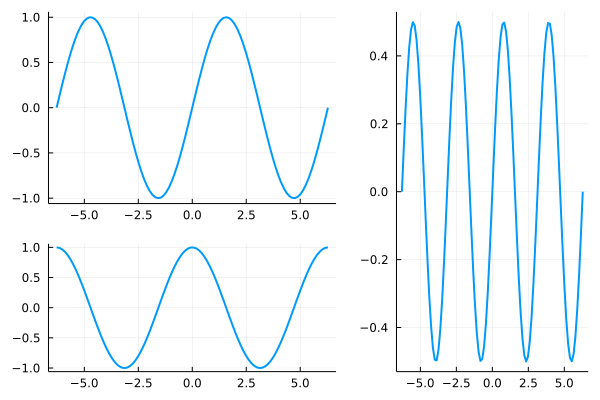

In [16]:
# Macro @layout can be used to create complicated arrangements
l = @layout [[a{0.6h}; b] c{0.4w}]
plot(p¹, p², p³, layout=l)

In [18]:
# Recipes are a generic way of defining new visualizations
struct MyData
    x::Vector{Float64}
    y::Vector{Float64}
end

data = MyData(rand(10), rand(10))    

MyData([0.06269014273183404, 0.5210599620321322, 0.011444174538169816, 0.05807507816271018, 0.810096576700976, 0.33716137880600083, 0.6118688690274495, 0.5001802797668432, 0.22917108786056872, 0.6378371999416633], [0.5649656454049428, 0.2546236385236551, 0.7296938864368795, 0.24851327094848852, 0.6207886511259613, 0.49019285291391956, 0.22502499415096178, 0.4683975455683054, 0.44168512428178397, 0.11936893736612442])

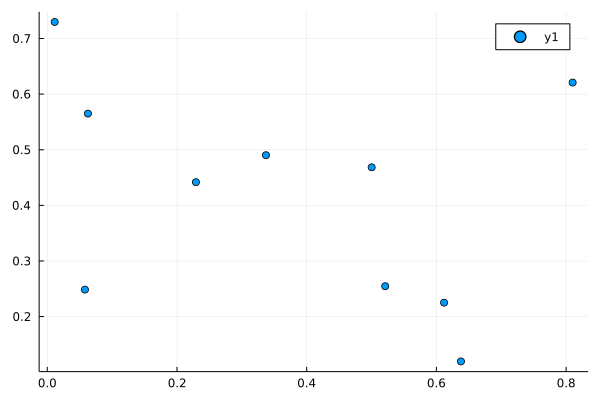

In [19]:
@recipe f(data::MyData) = (data.x, data.y)

scatter(data)

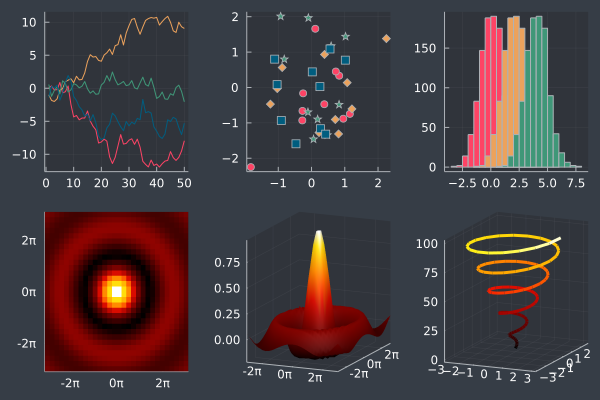

In [20]:
showtheme(:dark)

┌ Info: Saved animation to 
│   fn = /Users/lukas/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise 1/tmp.gif
└ @ Plots /Users/lukas/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/lukas/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise 1/tmp.gif")
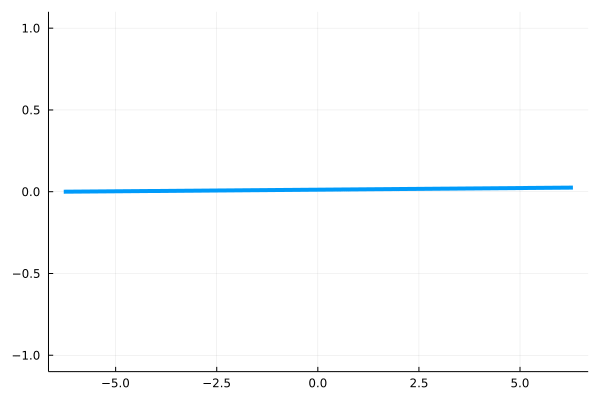

In [21]:
# @animate creates an Animation object that can be processed further
# @gif generates a .gif file
anim = @animate for i in 2:1000
    x = LinRange(-2π, 2π + i * 4π / 1000, i)
    plot(x, sin, ylims=(-1.1, 1.1), linewidth=4, label=false)
end every 5 # only plot every 5th iteration

gif(anim, fps=50)

In [11]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

Pkg.add("JLD2")
Pkg.add("Plots")
Pkg.add("ImageView")

using JLD2
using Plots
using ImageView


function filter_image(img, kernel)
    img_filtered = imfilter(img, kernel)
    return max.(img_filtered, 0), max.(-img_filtered, 0)
end

# Exercise 2.1
@load("sampleAERonlyOn.jld2")
#scatter3d(x_coords, y_coords, allTs)

# Exercise 2.2
mhi = Array{Float64}(undef, 128, 128)

for i in 2:length(allTs)
    # Update the mhi such that mhi(t) = max(0, mhi(told) − (t − told) · f),
    # where t is the current timestamp and told is the time stamp of the event
    # processed in the previous iteration and f = 0.00001
    mhi[x_coords[i], y_coords[i]] = max(0, mhi[x_coords[i-1], y_coords[i-1]] - (allTs[i] - allTs[i-1]) * 0.00001)
    mhi[x_coords[i], y_coords[i]] += 1
    if rem(i, 50) == 0
        plot(mhi)
    end
end


  Activating project at `~/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise0`
   Resolving package versions...
  No Changes to `~/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise0/Project.toml`
  No Changes to `~/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise0/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise0/Project.toml`
  No Changes to `~/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise0/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise0/Project.toml`
  No Changes to `~/Documents/Uni/Semester_2/ViMaM/Exercises/Exercise0/Manifest.toml`
